In [1]:
#this is the file to play around with the timeline data stored in json format

In [101]:
%matplotlib inline
import pandas as pd
import json
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import log

In [73]:
#read in json file
with open("../data/output_data/timelines/LeoDiCaprio.json") as infile:
    mydict=json.load(infile)

In [74]:
#create list of keys in dictionary
keylist=[i for i in mydict[0]]

In [75]:
#create the dataframe
def jsontodf(mydict):
    interestlist=['id','created_at','text','retweet_count']
    datalist=pd.DataFrame()
    for i in interestlist:
        datalist[i]=pd.Series([a[i] 
            #for littledict in mydict
                #for a in littledict])
                               for a in mydict])
    datalist['hashtags']=pd.Series([a['entities']['hashtags'] 
        #for littledict in mydict
            #for a in littledict])
                                    for a in mydict])
    return datalist

In [76]:
RevDF=jsontodf(mydict)


In [77]:
from datetime import datetime
RevDt=[datetime.strptime(i,'%a %b %d %H:%M:%S %z %Y').timetuple() for i in RevDF['created_at'].tolist()]


In [78]:
RevDt[0]

time.struct_time(tm_year=2016, tm_mon=1, tm_mday=30, tm_hour=17, tm_min=2, tm_sec=55, tm_wday=5, tm_yday=30, tm_isdst=-1)

In [79]:
wDay=pd.Series([a[6] for a in RevDt])
hourDay=pd.Series([a[3] for a in RevDt])
tcout=pd.Series([1 for a in RevDt])
heatdata=pd.DataFrame()
heatdata['day of the week']=wDay
heatdata['Hour of the day']=hourDay
heatdata['count']=tcout

In [80]:
sum((heatdata['day of the week']==1) & (heatdata['Hour of the day']==1))

1

In [81]:
heatdf=pd.DataFrame()
hour=pd.Series([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]*7)
day=pd.Series([0]*24+[1]*24+[2]*24+[3]*24+[4]*24+[5]*24+[6]*24)
heatdf['hour']=hour
heatdf['day']=day
        
        

In [82]:
heatdf['day'][167]

6

In [83]:
heatdf['count']=pd.Series(
    [sum((heatdata['day of the week']==heatdf['day'][i])&(heatdata['Hour of the day']==heatdf['hour'][i]))
     for i in range(len(heatdf))])

<module 'seaborn' from '/Users/jianglonghuang/anaconda/envs/py3sci_STAT222/lib/python3.5/site-packages/seaborn/__init__.py'>

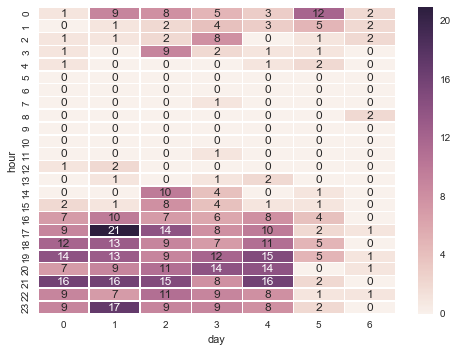

In [96]:
sns.set()

# Load the example flights dataset and conver to long-form

heatdf2 = heatdf.pivot("hour", "day", "count")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(heatdf2, annot=True, fmt="d", linewidths=.5)
sns

In [85]:
date=[a[7]+(a[0]-2015)*365 for a in RevDt]


AttributeError: 'time.struct_time' object has no attribute 'date'

(4, 10)

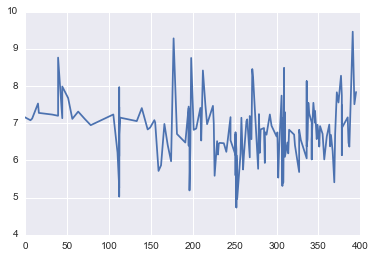

In [108]:
plt.plot(date, log(RevDF['retweet_count']))
plt.xlim((0,400))
plt.ylim((4,10))

In [88]:
def utcoffsetcovert(utc_offset):
    offset=abs(utc_offset)
    hour=str(offset//3600)
    if len(hour)==1:
        hour=str(0)+hour
        
    minute=str(offset%3600//60)
    if len(minute)==1:
        minute=str(0)+minute
        
    if utc_offset>=0:
        sign="+"
    else:
        sign='-'
        
    HHMM=sign+hour+minute
    return HHMM



In [93]:
utcoffsetcovert(mydict[10]['user']['utc_offset'])

'-0800'